# First Import the data and prepare it for input

In [1]:
import pandas as pd

src= "C:\\Users\\samue\\Downloads\\research_project\\Databases\\dataframe_internal_coordinates.csv"
df = pd.read_csv(src)

df

,Unnamed: 0,Amino Acids,phi,psi
0,0,ALA,NaN,2.833464
1,1,ALA,-2.637405,2.960152
2,2,ALA,-1.349753,2.491088
3,3,ALA,-1.612154,-0.667668
4,4,GLY,2.514027,-2.779758
...,...,...,...,...
24791,24791,GLY,-1.341804,-0.679040
24792,24792,PHE,-1.132378,-0.258407
24793,24793,LEU,-1.076224,-0.411400
24794,24794,GLY,-2.623170,0.560615


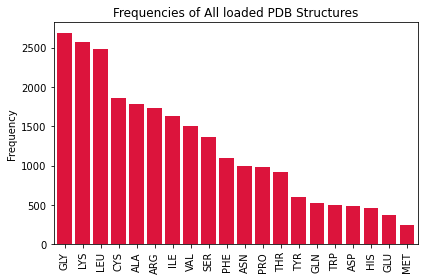

In [2]:
from collections import Counter #used to make a histogram of the amino acids
import numpy as np
from matplotlib import pyplot as plt
possible_AA= ['ala','arg','asn','asp','asx','cys','glu','gln','glx','gly','his','ile','leu','lys','met','phe','pro','ser','thr','trp','tyr','val']
#stored AA's
AAs = np.array(df['Amino Acids'])
tf = Counter(AAs)
y = [count for tag, count in tf.most_common(25)]
x = [tag for tag, count in tf.most_common(25)]

#graph formatting found online on stack overflow
plt.bar(x, y, color='crimson')
plt.title("Frequencies of All loaded PDB Structures")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'phi'}>],
       [<AxesSubplot:title={'center':'psi'}>, <AxesSubplot:>]],
      dtype=object)

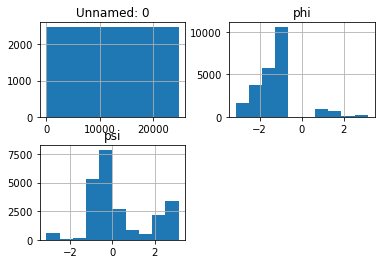

In [3]:
#angular distribution of phi and psi (in radians)
df.hist()

# Now we need to convert the AA's to fixed number values and normalize

In [4]:
coded_AA_list=[]
for i in df['Amino Acids']:
    for acid in possible_AA:
        if i.lower() == acid:
            #print(acid,possible_AA.index(acid))    #to visualize the conversion uncomment this
            coded_AA_list.append(possible_AA.index(acid)/22) #normalizing
            
               
df.insert(loc=df.columns.size, column='Coded_AA', value=coded_AA_list)

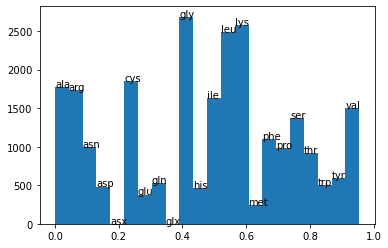

In [5]:
arr=plt.hist(coded_AA_list,bins=len(possible_AA))
for i in range(len(possible_AA)):
    plt.text(arr[1][i],arr[0][i],str(possible_AA[i]))


# Now normalize the range of the angles

In [6]:
from sklearn import preprocessing
import math

scaled_phi = preprocessing.minmax_scale(df['phi'],feature_range=(0,1))
scaled_psi = preprocessing.minmax_scale(df['psi'],feature_range=(0,1))

df.insert(loc=df.columns.size, column='scaled_phi', value=scaled_phi)
df.insert(loc=df.columns.size, column='scaled_psi', value=scaled_psi)


array([[<AxesSubplot:title={'center':'phi'}>,
        <AxesSubplot:title={'center':'scaled_phi'}>],
       [<AxesSubplot:title={'center':'psi'}>,
        <AxesSubplot:title={'center':'scaled_psi'}>]], dtype=object)

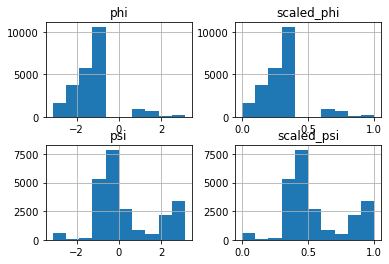

In [7]:
df[['phi','scaled_phi','psi','scaled_psi']].hist()

# Pad phi/psi/AA to same length with 0

In [8]:
#find max length to know how much to pad sequences are currently delimited by 0's

counter=0
lengths=[]
for phi in scaled_phi:
    if(math.isnan(phi)):
        lengths.append(counter)
        counter=0
    else:
        counter+=1
max(lengths)

44

In [9]:
#we need to find these nan's in the PSI's and insert enough zeros after them to reach a length of 44
df[0:10]

,Unnamed: 0,Amino Acids,phi,psi,Coded_AA,scaled_phi,scaled_psi
0,0,ALA,NaN,2.833464,0.000000,NaN,0.950972
1,1,ALA,-2.637405,2.960152,0.000000,0.079848,0.971136
2,2,ALA,-1.349753,2.491088,0.000000,0.284933,0.896479
3,3,ALA,-1.612154,-0.667668,0.000000,0.243140,0.393728
4,4,GLY,2.514027,-2.779758,0.409091,0.900319,0.057566
5,5,SER,-2.216942,2.486409,0.772727,0.146816,0.895735
6,6,VAL,-1.590854,-0.109528,0.954545,0.246533,0.482563
7,7,TRP,-1.795117,-0.296301,0.863636,0.214000,0.452836
8,8,GLY,-1.784287,1.648929,0.409091,0.215725,0.762440
9,9,ALA,-0.932471,-0.573457,0.000000,0.351394,0.408723


In [12]:
from tqdm import tqdm
counter=0
lengths=[]
df1 = pd.DataFrame(df.values,columns = df.columns)
for psi in tqdm(scaled_psi):
#     if counter >2000:
#         break
    if(math.isnan(psi)):
        while( ((counter+1)%44)!=0 ): #the first time the index starts at 0 so add 1
            df1 = pd.DataFrame(np.insert(df1.values, counter+1, values=["0"] *  len(df1.columns), axis=0),columns = df1.columns)
            counter +=1
        counter +=1
    else:
        counter+=1

print(df1[40:50])
print(df1[85:95])

100%|██████████| 24796/24796 [04:45<00:00, 86.85it/s] 

   Unnamed: 0 Amino Acids       phi       psi   Coded_AA scaled_phi scaled_psi
40         40         CYS   -1.7855   2.51228   0.227273   0.215532   0.899852
41         41         GLU  -1.61518   2.28009   0.272727   0.242659   0.862896
42         42         THR  -2.51892       NaN   0.818182  0.0987202        NaN
43          0           0         0         0          0          0          0
44         43         ALA       NaN  -3.05167          0        NaN  0.0142883
45         44         ALA -0.849234  -1.08765          0   0.364651   0.326884
46         45         CYS  -1.32217 -0.390064   0.227273   0.289326   0.437912
47         46         SER  -1.32191 -0.703854   0.772727   0.289367   0.387969
48         47         ASP  -2.51871 -0.659598   0.136364  0.0987526   0.395013
49         48         ARG  -1.13121 -0.665254  0.0454545    0.31974   0.394113
   Unnamed: 0 Amino Acids      phi       psi  Coded_AA scaled_phi scaled_psi
85          0           0        0         0         0

In [ ]:
df1

In [13]:
#need to set the remaining NAN's in the phi's to zero
df1['scaled_phi'] = df1['scaled_phi'].fillna(0)
df1['scaled_psi'] = df1['scaled_psi'].fillna(0)
df1

,Unnamed: 0,Amino Acids,phi,psi,Coded_AA,scaled_phi,scaled_psi
0,0,ALA,NaN,2.83346,0,0,0.950972
1,1,ALA,-2.63741,2.96015,0,0.0798484,0.971136
2,2,ALA,-1.34975,2.49109,0,0.284933,0.896479
3,3,ALA,-1.61215,-0.667668,0,0.24314,0.393728
4,4,GLY,2.51403,-2.77976,0.409091,0.900319,0.0575662
...,...,...,...,...,...,...,...
50243,0,0,0,0,0,0,0
50244,0,0,0,0,0,0,0
50245,0,0,0,0,0,0,0
50246,0,0,0,0,0,0,0


# Export prepped data to CSV

In [15]:
df1.to_csv('prepped_data.csv')